# Pre-processing and exploration of the data

# Summary

* [Pre-processing : checking for NaN values](#preprocessing)
    * [Beer datasets](#beer_processing)
    * [User datasets](#user_processing)
    * [Brewery datasets](#brewery_processing)
    
* [Exploration of the datasets](#exploration)
    * Summary statistics ? (discuter quoi mettre ici)
    * [Textual reviews](#textual_reviews)

* [SAT dataset](#sat)

In [1]:
#Uploading of the necessary libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import re

In [2]:
#Uploading of the datasets: 

DATASET_BEERADVOCATE = 'DATA/BeerAdvocate/'
DATASET_MATCHEDBEER = 'DATA/matched_beer_data/'
DATASET_RATEBEER = 'DATA/RateBeer/'

#Beer advocate dataset
df_adv_beer = pd.read_csv(DATASET_BEERADVOCATE + 'beers.csv')
df_adv_breweries = pd.read_csv(DATASET_BEERADVOCATE + 'breweries.csv')
df_adv_users = pd.read_csv(DATASET_BEERADVOCATE + 'users.csv')

#Matched beer dataset
df_md_beer = pd.read_csv(DATASET_MATCHEDBEER + 'beers.csv',skiprows=1)
df_md_beer_origin = pd.read_csv(DATASET_MATCHEDBEER + 'beers.csv', nrows=0)
df_md_breweries = pd.read_csv(DATASET_MATCHEDBEER + 'breweries.csv', skiprows=1)
df_md_breweries_origin = pd.read_csv(DATASET_MATCHEDBEER + 'breweries.csv', nrows=0)
df_md_users = pd.read_csv(DATASET_MATCHEDBEER + 'users.csv', skiprows=1)
df_md_users_origin = pd.read_csv(DATASET_MATCHEDBEER + 'users.csv', nrows=0)
df_md_users_approx = pd.read_csv(DATASET_MATCHEDBEER + 'users_approx.csv', skiprows=1)
df_md_users_approx_origin = pd.read_csv(DATASET_MATCHEDBEER + 'users_approx.csv', nrows=0)

##Add suffix of original dataset to columns' name
df_md_beer.columns = df_md_beer_origin.columns + '_' + df_md_beer.columns
df_md_breweries.columns = df_md_breweries_origin.columns + '_' + df_md_breweries.columns
df_md_users.columns = df_md_users_origin.columns + '_' + df_md_users.columns
df_md_users_approx.columns = df_md_users_approx_origin.columns + '_' + df_md_users_approx.columns

##remove '.' and numbers from column's name 
pattern_number = r'[0-9]'
pattern_dot = r'[.]'
df_md_beer = df_md_beer.rename(columns={c: re.sub(pattern_number,'',c) for c in df_md_beer.columns})
df_md_beer = df_md_beer.rename(columns={c: re.sub(pattern_dot,'',c) for c in df_md_beer.columns})
df_md_breweries = df_md_breweries.rename(columns={c: re.sub(pattern_number,'',c) for c in df_md_breweries.columns})
df_md_breweries = df_md_breweries.rename(columns={c: re.sub(pattern_dot,'',c) for c in df_md_breweries.columns})
df_md_users = df_md_users.rename(columns={c: re.sub(pattern_number,'',c) for c in df_md_users.columns})
df_md_users = df_md_users.rename(columns={c: re.sub(pattern_dot,'',c) for c in df_md_users.columns})
df_md_users_approx = df_md_users_approx.rename(columns={c: re.sub(pattern_number,'',c) for c in df_md_users_approx.columns})
df_md_users_approx = df_md_users_approx.rename(columns={c: re.sub(pattern_dot,'',c) for c in df_md_users_approx.columns})

#Ratebeer dataset
df_rb_beer = pd.read_csv(DATASET_RATEBEER + 'beers.csv')
df_rb_breweries = pd.read_csv(DATASET_RATEBEER + 'breweries.csv')
df_rb_users = pd.read_csv(DATASET_RATEBEER + 'users.csv')

<a id='preprocessing'></a>

## Pre-processing: checking for NaN values


<a id='beer_processing'></a>

### Beer datasets

In [3]:
#Let's have a look 
df_adv_beer.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN


In [4]:
df_md_beer.head()

,ba_abv,ba_avg,ba_avg_computed,ba_avg_matched_valid_ratings,ba_ba_score,ba_beer_id,ba_beer_name,ba_beer_wout_brewery_name,ba_brewery_id,ba_brewery_name,...,rb_brewery_id,rb_brewery_name,rb_nbr_matched_valid_ratings,rb_nbr_ratings,rb_overall_score,rb_style,rb_style_score,rb_zscore,scores_diff,scores_sim
0,4.8,3.45,3.439867,3.504068,80.0,19827,Legbiter,Legbiter,10093,Strangford Lough Brewing Company Ltd,...,4959,Strangford Lough,89,89,23.0,Golden Ale/Blond Ale,27.0,-0.698304,1.000000,1.0
1,6.0,3.86,3.888750,3.768333,NaN,20841,St. Patrick's Ale,Patricks Ale St,10093,Strangford Lough Brewing Company Ltd,...,4959,Strangford Lough,11,11,52.0,Irish Ale,79.0,0.005754,0.527141,1.0
2,4.2,3.56,3.556094,3.580417,82.0,20842,St. Patrick's Best,Patricks Best St,10093,Strangford Lough Brewing Company Ltd,...,4959,Strangford Lough,74,74,26.0,Bitter,25.0,-0.862119,0.527141,1.0
3,4.8,3.96,3.960000,3.960000,NaN,22659,St. Patrick's Gold,Patricks Gold St,10093,Strangford Lough Brewing Company Ltd,...,4959,Strangford Lough,4,4,NaN,Amber Ale,NaN,-0.758491,0.527141,1.0
4,4.5,NaN,NaN,NaN,NaN,178681,Sheelin Stout,Stout,32848,The Sheelin Brewery,...,17616,Sheelin,2,2,NaN,Mild Ale,NaN,-0.347271,1.000000,1.0


In [5]:
df_rb_beer.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,5.0,58.0,2.18,5.2,1.910000,NaN,0,NaN
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.0,22.0,1.83,4.5,1.811111,NaN,0,NaN
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,NaN,NaN,3.18,4.6,3.866667,0.823699,6,3.866667
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,NaN,NaN,2.79,4.2,3.000000,NaN,0,NaN


In [6]:
#Let's check the shape of the datasets: 

print("Beer advocate beer dataset has {} rows and {} colomns".format(df_adv_beer.shape[0],df_adv_beer.shape[1]))
print("Matched beer beer dataset has {} rows and {} colomns".format(df_md_beer.shape[0],df_md_beer.shape[1]))
print("RateBeer beer dataset has {} rows and {} colomns".format(df_rb_beer.shape[0],df_rb_beer.shape[1]))

Beer advocate beer dataset has 280823 rows and 15 colomns
Matched beer beer dataset has 45640 rows and 33 colomns
RateBeer beer dataset has 442081 rows and 14 colomns


Proportion of Na values for each column of the Beer Advocate beer dataset
beer_id                      0.000000
beer_name                    0.000000
brewery_id                   0.000000
brewery_name                 0.000000
style                        0.000000
nbr_ratings                  0.000000
nbr_reviews                  0.000000
nbr_matched_valid_ratings    0.000000
avg                          0.116903
avg_computed                 0.116946
abv                          0.128280
ba_score                     0.782069
zscore                       0.856547
avg_matched_valid_ratings    0.899324
bros_score                   0.979695
dtype: float64
Proportion of Na values for each column of the Matched beer beer dataset
ba_abv                          0.000000
rb_style                        0.000000
rb_nbr_ratings                  0.000000
rb_nbr_matched_valid_ratings    0.000000
rb_brewery_name                 0.000000
rb_brewery_id                   0.000000
rb_beer_wout_brewery_n

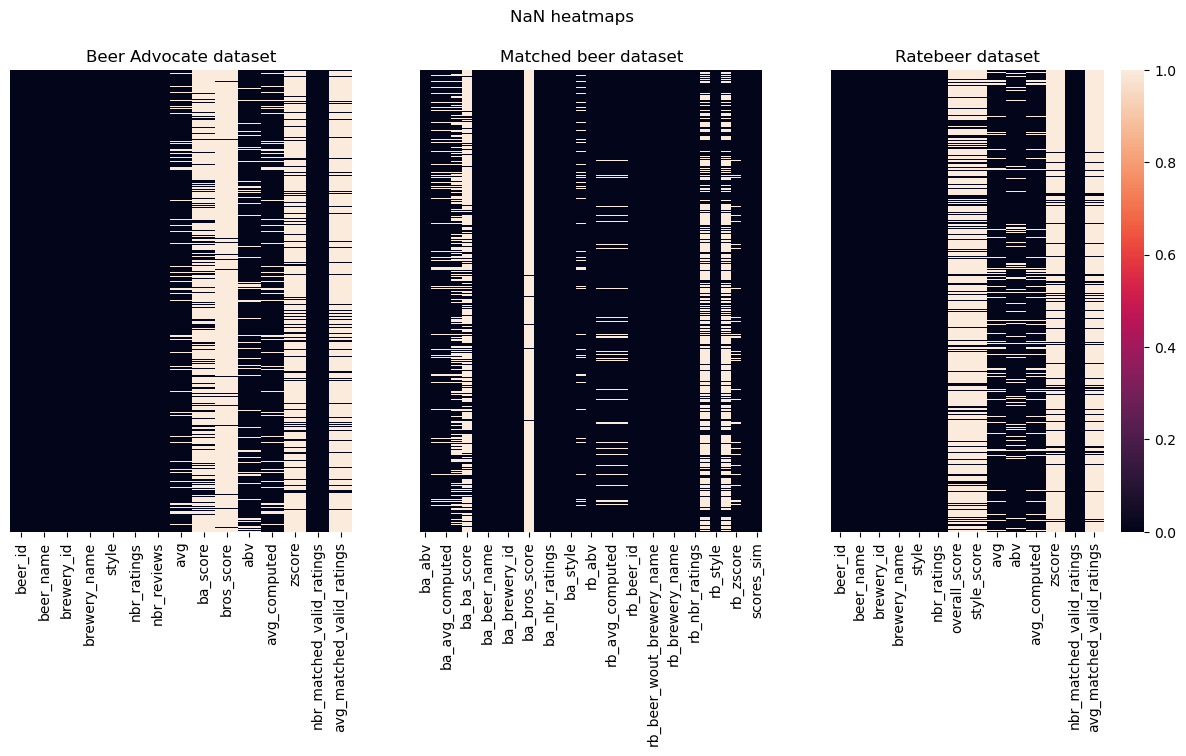

In [7]:
#We plot heatmaps for each dataset showing in white where there are NaN values (black: no NaN values)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,6))
plt.suptitle('NaN heatmaps')
ax1.title.set_text('Beer Advocate dataset')
ax2.title.set_text('Matched beer dataset')
ax3.title.set_text('Ratebeer dataset')
sns.heatmap(df_adv_beer.isna(),ax=ax1,cbar=False,yticklabels=False)
sns.heatmap(df_md_beer.isna(),ax=ax2,cbar=False,yticklabels=False)
sns.heatmap(df_rb_beer.isna(),ax=ax3,cbar=True,yticklabels=False)

print("Proportion of Na values for each column of the Beer Advocate beer dataset")
print((df_adv_beer.isna().sum()/df_adv_beer.shape[0]).sort_values(ascending=True))
print("Proportion of Na values for each column of the Matched beer beer dataset")
print((df_md_beer.isna().sum()/df_md_beer.shape[0]).sort_values(ascending=True))
print("Proportion of Na values for each column of the RateBeer beer dataset")
print((df_rb_beer.isna().sum()/df_rb_beer.shape[0]).sort_values(ascending=True))

We notice that a number of columns have a very high percentage of NA values. Analysis on these columns would be limited to a very narrow portion of the dataset, so we decide to drop these columns instead. We decide to drop columns that have more than 60% of NA values. 

In [8]:
df_adv_beer = df_adv_beer[df_adv_beer.columns[df_adv_beer.isna().sum()/df_adv_beer.shape[0] < 0.60]]
df_md_beer=df_md_beer[df_md_beer.columns[df_md_beer.isna().sum()/df_md_beer.shape[0] < 0.60]]
df_rb_beer=df_rb_beer[df_rb_beer.columns[df_rb_beer.isna().sum()/df_rb_beer.shape[0] < 0.60]]

In [9]:
#We check that all beers are unique in both datasets
print(df_adv_beer["beer_id"].nunique()==df_adv_beer.shape[0])
print(df_rb_beer["beer_id"].nunique()==df_rb_beer.shape[0])

True
True


In [11]:
#Some beers don't have ratings. We are not interested in them, so we drop them
df_adv_beer_wrating=df_adv_beer.drop(df_adv_beer[df_adv_beer['nbr_ratings']==0].index)
print("{} beers of the Beer Advocate dataset have been dropped".format((df_adv_beer.shape[0]-df_adv_beer_wrating.shape[0])))
df_md_beer_wrating=df_md_beer.drop(df_md_beer[df_md_beer['rb_nbr_ratings']==0].index)
df_md_beer_wrating=df_md_beer_wrating.drop(df_md_beer_wrating[df_md_beer_wrating['ba_nbr_ratings']==0].index)
print("{} beers of the matched dataset have been dropped".format((df_md_beer.shape[0]-df_md_beer_wrating.shape[0])))
df_rb_beer_wrating=df_rb_beer.drop(df_rb_beer[df_rb_beer['nbr_ratings']==0].index)
print("{} beers of the RateBeer dataset have been dropped".format((df_rb_beer.shape[0]-df_rb_beer_wrating.shape[0])))

32841 beers of the Beer Advocate dataset have been dropped
7563 beers of the matched dataset have been dropped
45391 beers of the RateBeer dataset have been dropped


<a id='user_processing'></a>

### Users datasets 

In [12]:
#Let's have a look 
df_adv_users.head()

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland


In [13]:
df_md_users.head()

,ba_joined,ba_location,ba_nbr_ratings,ba_nbr_reviews,ba_user_id,ba_user_name,ba_user_name_lower,rb_joined,rb_location,rb_nbr_ratings,rb_user_id,rb_user_name,rb_user_name_lower
0,1.220868e+09,Germany,6,6,erzengel.248045,Erzengel,erzengel,1.224324e+09,Germany,8781,83106,Erzengel,erzengel
1,1.348394e+09,"United States, Virginia",1,1,gendv138.695700,GenDV138,gendv138,1.385723e+09,"United States, Virginia",6240,290599,GenDV138,gendv138
2,1.207303e+09,"United States, Washington",3,3,nimbleprop.208928,nimbleprop,nimbleprop,1.150798e+09,"United States, Washington",7452,38859,nimbleprop,nimbleprop
3,1.322737e+09,Estonia,11,0,visionthing.639993,visionthing,visionthing,1.242986e+09,Estonia,5462,91324,visionthing,visionthing
4,1.432116e+09,England,1,0,lazypyro.989356,LazyPyro,lazypyro,1.431166e+09,England,1096,368991,LazyPyro,lazypyro


In [14]:
df_adv_users.head()

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland


In [15]:
#Let's check the shape of the datasets
print("Beer advocate users dataset has {} rows and {} colomns".format(df_adv_users.shape[0],df_adv_users.shape[1]))
print("Matched beer users dataset has {} rows and {} colomns".format(df_md_users.shape[0],df_md_users.shape[1]))
print("RateBeer users dataset has {} rows and {} colomns".format(df_rb_users.shape[0],df_rb_users.shape[1]))

Beer advocate users dataset has 153704 rows and 6 colomns
Matched beer users dataset has 3020 rows and 13 colomns
RateBeer users dataset has 70174 rows and 5 colomns


In [16]:
#Drop users that are in duplicates in the dataset

df_adv_unique_users=df_adv_users.drop_duplicates(subset="user_id",keep="first") #suppresses all copies of same user_id and keeps the first instance
#sanity check 
print(df_adv_unique_users.shape[0]==df_adv_unique_users["user_id"].nunique())

#df_md_unique_users=df_md_users.drop_duplicates(subset="user_id",keep="first") #what do we do with md
#sanity check 
#print(df_md_unique_users.shape[0]==df_md_unique_users["user_id"].nunique())

df_rb_unique_users=df_rb_users.drop_duplicates(subset="user_id",keep="first") 
#sanity check 
print(df_rb_unique_users.shape[0]==df_rb_unique_users["user_id"].nunique())

True
True


<a id='brewery_processing'></a>

### Breweries dataset

In [17]:
#Let's check the shape of the breweries dataset
print("Beer advocate breweries dataset has {} rows and {} colomns".format(df_adv_breweries.shape[0],df_adv_breweries.shape[1]))
print("Matched beer breweries dataset has {} rows and {} colomns".format(df_md_breweries.shape[0],df_md_breweries.shape[1]))
print("RateBeer breweries dataset has {} rows and {} colomns".format(df_rb_breweries.shape[0],df_rb_breweries.shape[1]))

Beer advocate breweries dataset has 16758 rows and 4 colomns
Matched beer breweries dataset has 8281 rows and 10 colomns
RateBeer breweries dataset has 24189 rows and 4 colomns


In [18]:
#Let's have a look
df_adv_breweries.head()

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2


In [19]:
df_md_breweries.head()

,ba_id,ba_location,ba_name,ba_nbr_beers,rb_id,rb_location,rb_name,rb_nbr_beers,scores_diff,scores_sim
0,10093,Northern Ireland,Strangford Lough Brewing Company Ltd,5,4959,Northern Ireland,Strangford Lough,5,0.431275,0.889062
1,32848,Northern Ireland,The Sheelin Brewery,4,17616,Northern Ireland,Sheelin,2,0.526388,0.863596
2,40360,Northern Ireland,Walled City Brewing Company,6,24866,Northern Ireland,Walled City,3,0.527852,0.954183
3,40309,Northern Ireland,Ards Brewing Company,7,13538,Northern Ireland,Ards Brewing Co.,13,0.554395,0.896098
4,41205,Northern Ireland,Barrahooley Brewery,3,22304,Northern Ireland,Barrahooley Craft Brewery,4,0.602544,0.896205


In [20]:
df_rb_breweries.head()

,id,location,name,nbr_beers
0,3198,Gabon,Sobraga,3
1,13538,Northern Ireland,Ards Brewing Co.,13
2,22304,Northern Ireland,Barrahooley Craft Brewery,4
3,22818,Northern Ireland,Boundary,66
4,24297,Northern Ireland,Brewbot Belfast,3


In [21]:
#We don't care about breweries that don't have any beers, so we drop them 

df_adv_breweries_wbeer=df_adv_breweries.drop(df_adv_breweries[df_adv_breweries['nbr_beers']==0].index)
df_adv_breweries_wbeer['nbr_beers'].sort_values(ascending=True) #pq je fais ça lol ?
print("{} breweries have been dropped from the Beer Advocate dataset".format((df_adv_breweries.shape[0]-df_adv_breweries_wbeer.shape[0])))

df_md_breweries_wbeer=df_md_breweries.drop(df_md_breweries[df_md_breweries['rb_nbr_beers']==0].index)
df_md_breweries_wbeer=df_md_breweries_wbeer.drop(df_md_breweries_wbeer[df_md_breweries_wbeer['ba_nbr_beers']==0].index)
df_md_breweries_wbeer.sort_values(by="ba_nbr_beers",ascending=True)
print("{} breweries have been dropped from the Matched Beer dataset".format((df_md_breweries.shape[0]-df_md_breweries_wbeer.shape[0])))

df_rb_breweries_wbeer=df_rb_breweries.drop(df_rb_breweries[df_rb_breweries['nbr_beers']==0].index)
df_rb_breweries_wbeer['nbr_beers'].sort_values(ascending=True)
print("{} breweries have been dropped from the RateBeer dataset".format((df_rb_breweries.shape[0]-df_rb_breweries_wbeer.shape[0])))

2236 breweries have been dropped from the Beer Advocate dataset
681 breweries have been dropped from the Matched Beer dataset
71 breweries have been dropped from the RateBeer dataset


<a id='exploration'></a>

## Exploration of the datasets 


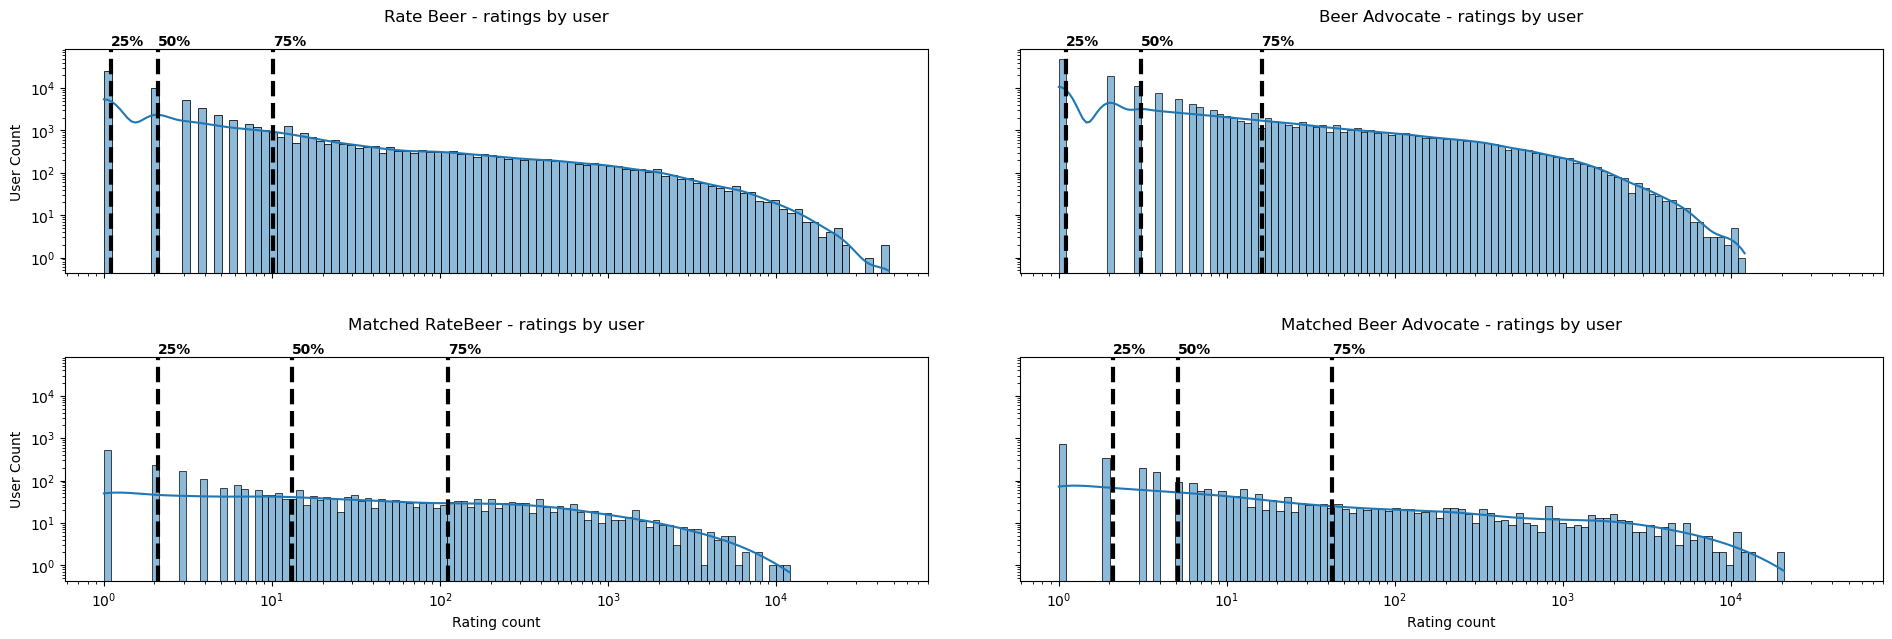

In [28]:
#Histograms
#Users binned by rating count
quantiles = [0.25, 0.5, 0.75]
titles = ['Rate Beer - ratings by user', 'Beer Advocate - ratings by user', 'Matched RateBeer - ratings by user','Matched Beer Advocate - ratings by user']
plot_data = [df_rb_users.nbr_ratings, df_adv_users.nbr_ratings, df_md_users.ba_nbr_ratings,df_md_users.rb_nbr_ratings]


fig, axes = plt.subplots(2, 2, figsize=(20, 7),sharey=True,sharex=True)
fig.tight_layout(pad=5)
for i,datum in enumerate(plot_data):
    sns.histplot(ax=axes.flat[i],data=datum,bins=100,log_scale=(True,True), kde=True)
    axes.flat[i].set_xlabel("Rating count")
    axes.flat[i].set_ylabel("User Count")
    axes.flat[i].set_title(titles[i], pad=20)
    for q in quantiles:
        #Offset of 0.1 so it is more lisible
        axes.flat[i].axvline(plot_data[i].quantile(q)+0.1, 0, 1, color="black", ls='--',linewidth=3)
        axes.flat[i].text(plot_data[i].quantile(q)+0.1, 1e5, str(int(q*100))+'%', horizontalalignment='left', size='medium', color='black', weight='semibold')
      

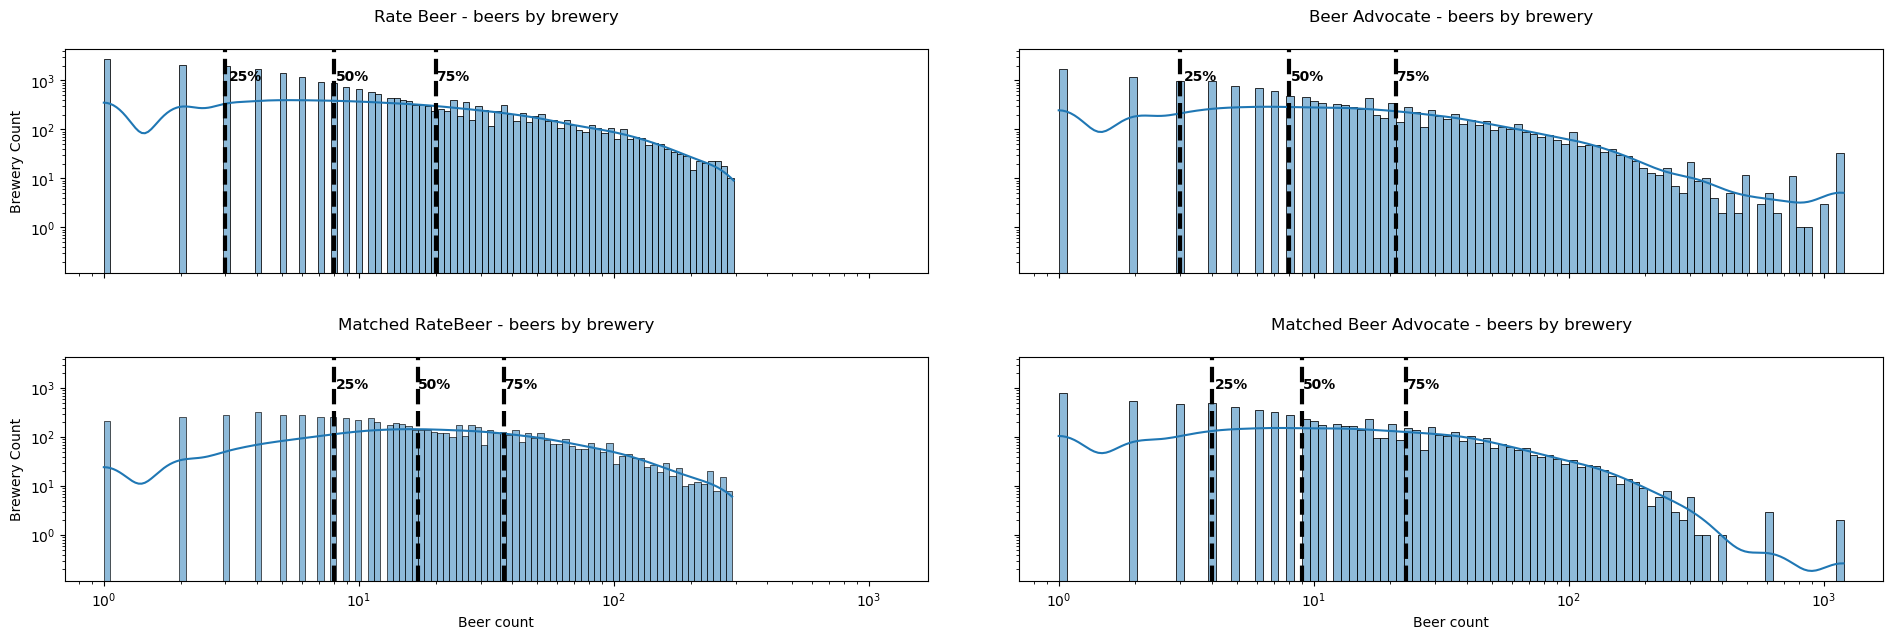

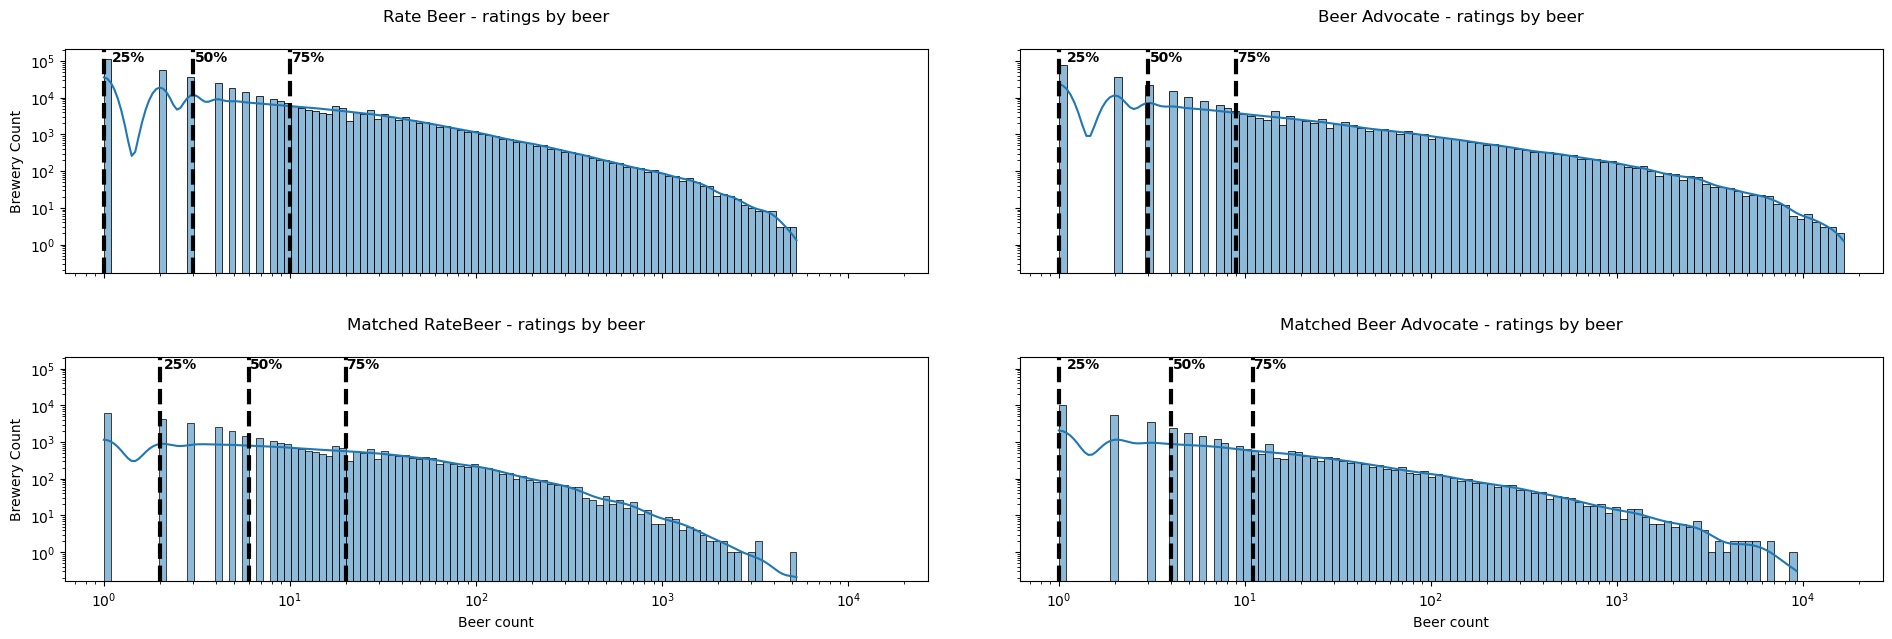

In [29]:
#Breweries binned by beer count

titles = ['Rate Beer - beers by brewery', 'Beer Advocate - beers by brewery', 'Matched RateBeer - beers by brewery','Matched Beer Advocate - beers by brewery']
plot_data = [df_rb_breweries_wbeer.nbr_beers, df_adv_breweries_wbeer.nbr_beers, df_md_breweries_wbeer.rb_nbr_beers,df_md_breweries_wbeer.ba_nbr_beers]

fig, axes = plt.subplots(2, 2, figsize=(20, 7),sharey=True,sharex=True)
fig.tight_layout(pad=5)
for i,datum in enumerate(plot_data):
    sns.histplot(ax=axes.flat[i],data=datum,bins=100,log_scale=(True,True), kde=True)
    axes.flat[i].set_xlabel("Beer count")
    axes.flat[i].set_ylabel("Brewery Count")
    axes.flat[i].set_title(titles[i], pad=20)
    for q in quantiles:
        axes.flat[i].axvline(plot_data[i].quantile(q), 0, 1, color="black", ls='--',linewidth=3)
        axes.flat[i].text(plot_data[i].quantile(q)+0.1, 1e3, str(int(q*100))+'%', horizontalalignment='left', size='medium', color='black', weight='semibold')

        
#Beers binned by ratings count:


titles = ['Rate Beer - ratings by beer', 'Beer Advocate - ratings by beer', 'Matched RateBeer - ratings by beer','Matched Beer Advocate - ratings by beer']
plot_data = [df_rb_beer_wrating.nbr_ratings, df_adv_beer_wrating.nbr_ratings, df_md_beer_wrating.rb_nbr_ratings, df_md_beer_wrating.ba_nbr_ratings]


fig, axes = plt.subplots(2, 2, figsize=(20, 7),sharey=True,sharex=True)
fig.tight_layout(pad=5)
for i,datum in enumerate(plot_data):
    sns.histplot(ax=axes.flat[i],data=datum,bins=100,log_scale=(True,True), kde=True)
    axes.flat[i].set_xlabel("Beer count")
    axes.flat[i].set_ylabel("Brewery Count")
    axes.flat[i].set_title(titles[i], pad=20)
    for q in quantiles:
        axes.flat[i].axvline(plot_data[i].quantile(q), 0, 1, color="black", ls='--',linewidth=3)
        axes.flat[i].text(plot_data[i].quantile(q)+0.1, 1e5, str(int(q*100))+'%', horizontalalignment='left', size='medium', color='black', weight='semibold')

  

<a id='textual_reviews'></a>
## Textual reviews

<a id='sat'></a>
## SAT Dataset